In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

## Aufgabe 1)

In [2]:
# Konstanten

r = 1/3
K = 25
beta = 0.1
V0 = 3

In [3]:
# Funktionen

def G_V(V: float) -> float:
    """Beschreibt Wachstum der Herde"""
    return r*V*(1 - V/K)

def c_V(V: float) -> float:
    """Beschreibt Verzeher einer Kuh"""
    return (beta*V**2) / (V0**2 + V**2)

### (a)

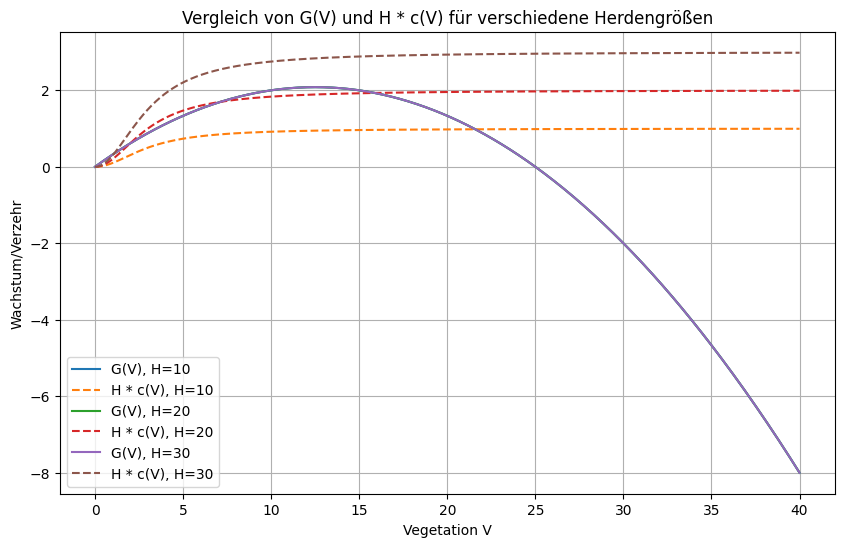

In [4]:
H = [10, 20, 30]

V = np.linspace(0, 40, 500)

plt.figure(figsize=(10, 6))

for h in H:
    plt.plot(V, G_V(V), label=f'G(V), H={h}')
    plt.plot(V, h * c_V(V), label=f'H * c(V), H={h}', linestyle='--')
    
plt.xlabel('Vegetation V')
plt.ylabel('Wachstum/Verzehr')
plt.legend()
plt.title('Vergleich von G(V) und H * c(V) für verschiedene Herdengrößen')
plt.grid(True)
plt.show()

### (b)

In [5]:
def dV_dt(V: float, H: int) -> float:
    return G_V(V) - H * c_V(V)

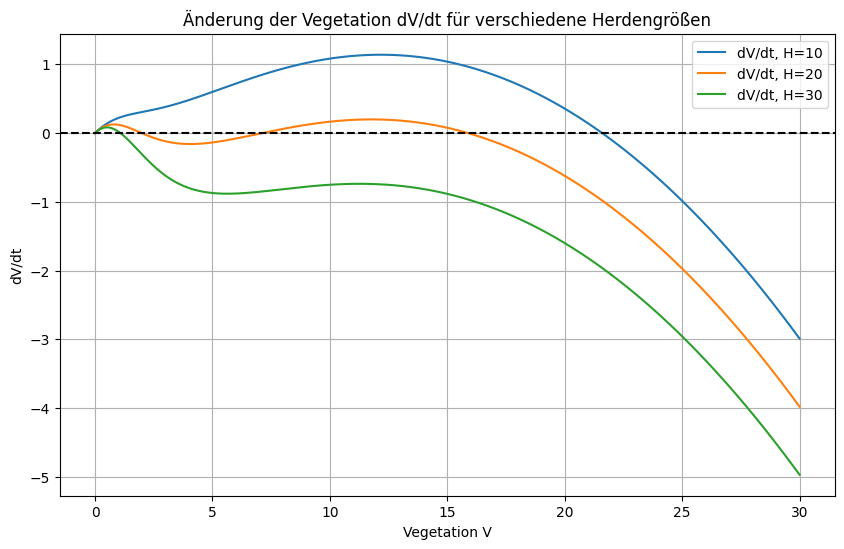

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


,h=10,h=20,h=30
0,0.000,0.000,0.000
1,21.592,1.986,1.081
2,NaN,7.135,11.240
3,NaN,15.879,11.246
4,NaN,NaN,11.249
5,NaN,NaN,11.255
6,NaN,NaN,11.258
7,NaN,NaN,11.259
8,NaN,NaN,11.260
9,NaN,NaN,11.261


In [19]:
H = [10, 20, 30]

V = np.linspace(0, 30, 500)

plt.figure(figsize=(10, 6))

for h in H:
    plt.plot(V, dV_dt(V, h), label=f'dV/dt, H={h}')

plt.xlabel('Vegetation V')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('dV/dt')
plt.legend()
plt.title('Änderung der Vegetation dV/dt für verschiedene Herdengrößen')
plt.grid(True)
plt.show()

### Gleichgeweichte
equilibria = {}
V_initial_guesses = np.linspace(0, K, 50)

for h in H:
    eq_points = []
    for V0_guess in V_initial_guesses:
        V_star = fsolve(dV_dt, V0_guess, args=(h))
        if 0 <= V_star[0] <= K:
            eq_points.append(V_star[0])
    
    equilibria[h] = np.unique(np.round(eq_points, decimals=3))

df_equilibria = pd.DataFrame.from_dict(equilibria, orient='index').T
df_equilibria.columns = [f'h={h}' for h in H]

df_equilibria

In [22]:
from scipy.misc import derivative

def d_dV_dV(V, h):
    return derivative(dV_dt, V, dx=1e-5, args=(h,))

stability = {}
for h in H:
    stability[h] = []
    for V_star in equilibria[h]:
        dV_dt_derivative = d_dV_dV(V_star, h)
        if dV_dt_derivative < 0:
            stability[h].append("stabil")
        else:
            stability[h].append("instabil")

df_stability = pd.DataFrame.from_dict(stability, orient='index').T
df_stability.columns = [f'h={h}' for h in H]
df_stability

/var/folders/d_/brlfzfpj08j7n_w_tyhqt60m0000gn/T/ipykernel_17592/3807770151.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(dV_dt, V, dx=1e-5, args=(h,))


,h=10,h=20,h=30
0,instabil,instabil,instabil
1,stabil,stabil,stabil
2,None,instabil,instabil
3,None,stabil,instabil
4,None,None,instabil
5,None,None,instabil
6,None,None,instabil
7,None,None,instabil
8,None,None,instabil
9,None,None,instabil


## Aufgabe 2)

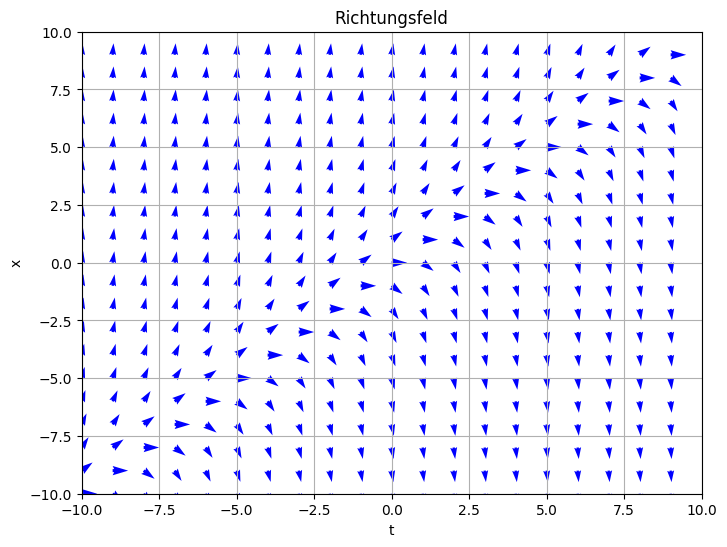

In [11]:
def diff(x, t):
    return x - t 

def richtungsfeld_plot(diff, xmin, xmax, tmin, tmax, x_step, t_step):
    t_vals = np.arange(tmin, tmax, t_step)
    x_vals = np.arange(xmin, xmax, x_step)
    
    plt.figure(figsize=(8, 6))
    
    for t in t_vals:
        for x in x_vals:
            slope = diff(x, t)
            norm = np.sqrt(1 + slope**2)
            plt.quiver(t, x, 1/norm, slope/norm, angles='xy', scale_units='xy', scale=2, color='blue')

    plt.xlim(tmin, tmax)
    plt.ylim(xmin, xmax)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Richtungsfeld')
    plt.grid(True)
    plt.show()

xmin, xmax = -10, 10
tmin, tmax = -10, 10
x_step, t_step = 1, 1

richtungsfeld_plot(diff, xmin, xmax, tmin, tmax, x_step, t_step)
